<a href="https://colab.research.google.com/github/huggoparcelly/rec-info/blob/main/Huggo_Parcelly_Processamento_de_Texto_(Alunos).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Processamento de Texto

Nesse notebook, nós vamos ver na prática como podemos aplicar algumas técnicas de processamento de texto programaticamente, usando algumas bibliotecas conhecidas.

## NLTK

Vamos começar usando a biblioteca  [NLTK (Natural Language Toolkit)](https://www.nltk.org/).

Primeiramente, vamos importar as bibliotecas python que vamos usar nesse tutorial:

In [ ]:
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from nltk.corpus import wordnet
from nltk.probability import FreqDist
from nltk.stem import PorterStemmer, SnowballStemmer, WordNetLemmatizer
from nltk.tokenize import sent_tokenize, word_tokenize

%matplotlib inline

e vamos fazer o download de alguns módulos específicos do NLTK:

In [ ]:
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

### Tokenization

#### Sentence Tokenization

In [ ]:
text = """Hello Mr. Smith, how are you doing today?
    The weather is great, and city is awesome.
    The sky is pinkish-blue. You shouldn't eat cardboard
"""

tokenized_sent = sent_tokenize(text)
print(tokenized_sent)

['Hello Mr. Smith, how are you doing today?', 'The weather is great, and city is awesome.', 'The sky is pinkish-blue.', "You shouldn't eat cardboard"]


Nós também podemos tokenizar outras linguas:

In [ ]:
portuguese_text = "Bom dia, Sr. Smith. Como você está? O tempo está bom, e a cidade maravilhosa."

print(sent_tokenize(portuguese_text, "portuguese"))

['Bom dia, Sr. Smith.', 'Como você está?', 'O tempo está bom, e a cidade maravilhosa.']


#### Word Tokenization

In [ ]:
tokenized_word = word_tokenize(text)
print(tokenized_word)

['Hello', 'Mr.', 'Smith', ',', 'how', 'are', 'you', 'doing', 'today', '?', 'The', 'weather', 'is', 'great', ',', 'and', 'city', 'is', 'awesome', '.', 'The', 'sky', 'is', 'pinkish-blue', '.', 'You', 'should', "n't", 'eat', 'cardboard']


No exemplo acima, a tokenização de palavras foi aplicada ao texto inteiro. Porém, normalmente, o fluxo adotado é aplicar a tokenização nas sentenças e, em seguida, aplicar nas palavras de cada sentença.

### Remoção de Pontuação

Remova a pontuação das sentenças 'tokenizadas', antes de aplicar o tokenizador de palavras.

**Veja exemplos abaixo:**

**EXEMPLO 1**

Um dos [tipos de tokenizer oferecidos pelo NLTK](http://www.nltk.org/api/nltk.tokenize.html) é baseado em Expressões Regulares (Regex).
Então, por exemplo, você pode definir um tokenizer que detecta sequências de caracteres alfanuméricos como tokens e descarta todo o resto:

In [ ]:
from nltk.tokenize import RegexpTokenizer

text = """Hello Mr. Smith, how are you doing today?
    Here the weather is great, the temperature is 25 degrees celsius and today's IR Lab is awesome.
    You should come and enjoy this joy-filled environment!
"""

tokenized_sent = sent_tokenize(text)

tokenizer = RegexpTokenizer(r'\w+') #ou r'[a-zA-Z]+' se não quiser incluir números e underscore, pois \w+ equivale a [a-zA-Z0-9_]+
for sent in tokenized_sent:
  sent_without_punct = tokenizer.tokenize(sent)
  print(sent_without_punct)

['Hello', 'Mr', 'Smith', 'how', 'are', 'you', 'doing', 'today']
['Here', 'the', 'weather', 'is', 'great', 'the', 'temperature', 'is', '25', 'degrees', 'celsius', 'and', 'today', 's', 'IR', 'Lab', 'is', 'awesome']
['You', 'should', 'come', 'and', 'enjoy', 'this', 'joy', 'filled', 'environment']


**EXEMPLO 2**

Ou dessa outra forma, em puro python:

In [ ]:
import string
text = """Hello Mr. Smith, how are you doing today?
    Here the weather is great, the temperature is 25 degrees celsius and today's IR Lab is awesome.
    You should come and enjoy this joy-filled environment!
"""
unicode_translate_table = dict((ord(char), None) for char in string.punctuation)

tokenized_sent = sent_tokenize(text)

for sent in tokenized_sent:
  sent_without_punct = sent.translate(unicode_translate_table)
  print(sent_without_punct)

Hello Mr Smith how are you doing today
Here the weather is great the temperature is 25 degrees celsius and todays IR Lab is awesome
You should come and enjoy this joyfilled environment


**EXEMPLO 3**

Uma outra alternativa é usar `isalpha()` ou `isalnum()`. Neste caso, você deve aplicar depois da tokenização de palavras, para remover as que não se adequem.

In [ ]:
text = """Hello Mr. Smith, how are you doing today?
    Here the weather is great, the temperature is 25 degrees celsius and today's IR Lab is awesome.
    You should come and enjoy this joy-filled environment!
"""

tokens = [word.lower() for sent in sent_tokenize(text) for word in word_tokenize(sent) if word.isalnum()] #também converte para lowercase
print(*tokens)

hello smith how are you doing today here the weather is great the temperature is 25 degrees celsius and today ir lab is awesome you should come and enjoy this environment


### Expanção das contrações (contractions)


In [ ]:
!pip install contractions

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.8/110.8 kB 6.2 MB/s eta 0:00:00


In [ ]:
import contractions

contractions.fix("I'll show you a simple example, it's easy to understand. \
I don't wanna show anything else because I'm lazy. I'm gonna stop writing now. \
I'd love to stay, but I've got to go! I gotta go! Shouldn't you go too? \
No, I know you are enjoying today's IR Lab!!")

"I will show you a simple example, it is easy to understand. I do not want to show anything else because I am lazy. I am going to stop writing now. I would love to stay, but I have got to go! I got to go! Should not you go too? No, I know you are enjoying today's IR Lab!!"

### Frequency Distribution

In [ ]:
fdist = FreqDist(tokenized_word)
print(fdist)

<FreqDist with 25 samples and 30 outcomes>


In [ ]:
fdist

FreqDist({'is': 3, ',': 2, 'The': 2, '.': 2, 'Hello': 1, 'Mr.': 1, 'Smith': 1, 'how': 1, 'are': 1, 'you': 1, ...})

In [ ]:
fdist.most_common(5)

[('is', 3), (',', 2), ('The', 2), ('.', 2), ('Hello', 1)]

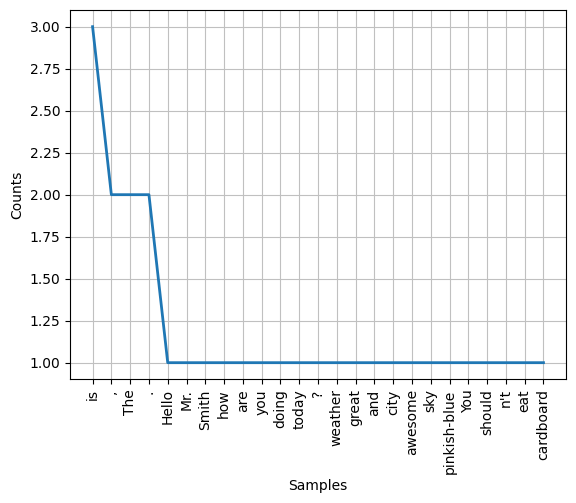

In [ ]:
fdist.plot(30, cumulative=False)
plt.show()

### Stopwords

In [ ]:
stop_words = set(stopwords.words("english"))

print(stop_words)

{'we', 'll', 'how', 'after', 'before', 'why', "mustn't", "wasn't", 'which', 'ours', 'below', 'no', 'can', 'theirs', 'both', 'to', 'do', 'this', 'once', 'the', 'when', 'now', 'and', 'doing', 'where', 'yours', 'their', 'that', 'for', 'mightn', 'its', 'as', 'wouldn', 'down', 'm', 'or', 'above', 'doesn', 'a', "shouldn't", 'while', 'will', "you're", 'ain', 've', 'very', 'up', 'being', 'whom', 'was', 'has', 'with', 'all', 'each', "she's", "isn't", 'shan', 'between', 'it', "needn't", 'hadn', "shan't", 'hasn', "don't", 'in', 'just', "weren't", 'yourselves', 'about', 'were', 'are', 'further', 'some', 'off', 'against', 'my', "couldn't", 'having', 'weren', 'have', 'but', 'by', 'he', 'until', 'into', 'nor', 'same', 're', 'ourselves', "you've", 'y', 'i', 'then', 'his', 'what', 'ma', 'myself', 'yourself', 'those', 'them', "that'll", 'isn', 'because', 'not', 'on', 'here', 'needn', 'our', 'few', 'been', 'your', 'am', 'only', 'wasn', 'aren', 'such', 'than', 'she', 'out', 'an', 'd', 'me', 'who', 'is', '

**TODO**: A partir da lista de palavras tokenizadas acima, gere uma nova lista de palavras que não contém stop words (use list  comprehension)

In [ ]:
filtered_words =  [word for word in tokenized_word if word not in stop_words]

print("Tokenized Words:", tokenized_word)
print("Filterd Sentence:", filtered_words)

Tokenized Words: ['Hello', 'Mr.', 'Smith', ',', 'how', 'are', 'you', 'doing', 'today', '?', 'The', 'weather', 'is', 'great', ',', 'and', 'city', 'is', 'awesome', '.', 'The', 'sky', 'is', 'pinkish-blue', '.', 'You', 'should', "n't", 'eat', 'cardboard']
Filterd Sentence: ['Hello', 'Mr.', 'Smith', ',', 'today', '?', 'The', 'weather', 'great', ',', 'city', 'awesome', '.', 'The', 'sky', 'pinkish-blue', '.', 'You', "n't", 'eat', 'cardboard']


### Stemming

A **Stemming** reduz as palavras aos seus radicais. Por exemplo, as palavras *connection*, *connected*, *connecting* serão reduzidas a "*connect*". Há diversos algoritmos de stemming, mas o mais famoso é o `Porter stemming`.

In [ ]:
example_words = ['connection', 'connected', 'connecting']

ps = PorterStemmer()

stemmed_words = [ps.stem(w) for w in example_words]

print("Example words:", example_words)
print("Stemmed words:", stemmed_words)

Example words: ['connection', 'connected', 'connecting']
Stemmed words: ['connect', 'connect', 'connect']


O algoritmo `SnowBall` pode faz o processo de stemming em até 13 línguas diferentes:

In [ ]:
print(SnowballStemmer.languages)

('arabic', 'danish', 'dutch', 'english', 'finnish', 'french', 'german', 'hungarian', 'italian', 'norwegian', 'porter', 'portuguese', 'romanian', 'russian', 'spanish', 'swedish')


Vamos ver como funciona em português!

**TODO:** Crie 4 listas de palavras em português contendo radicais similares (cada lista deve conter ao menos 2 palavras - preferencialmente 3 ou mais).

Para cada uma das listas, gere uma outra lista com termos equivalentes "stemizados".

Suas listas originais devem conter palavras que gerem stems do tipo: verdadeiros positivos, verdadeiros negativos, falsos positivos, falsos negativos.

tp = você acha que o resultado do stemmer deve ser os mesmo para todos os termos da lista (e confirma que é em tp_stemmed)

tn = mas você acha que o resultado do stemmer deve ser diferente para todos os termos da lista, embora os radicais sejam similares (e confirma que são em tn_stemmed)

fp = você acha que o resultado do stemmer deve ser diferente para todos os termos da lista (mas percebe em fp_stemmed que são iguais)

fn = você acha que o resultado do stemmer deve ser igual para todos os termos da lista (mas percebe em fn_stemmed que são diferentes)

In [ ]:
tp = ['passar', 'passaria', 'passou', 'passando']
tn = ['maçaneta', 'maçaroca', 'maçã-verde']
fp = ['planta', 'plantava', 'plantou', 'plantar', 'plantas']
fn = ['maquineta','maquina', 'maquinario']

ss = SnowballStemmer("portuguese")

tp_stemmed = [ss.stem(w) for w in tp]
tn_stemmed = [ss.stem(w) for w in tn]
fp_stemmed = [ss.stem(w) for w in fp]
fn_stemmed = [ss.stem(w) for w in fn]

print('TP Stemmed:', tp_stemmed)
print('TN Stemmed:', tn_stemmed)
print('FP Stemmed:', fp_stemmed)
print('FN Stemmed:', fn_stemmed)

TP Stemmed: ['pass', 'pass', 'pass', 'pass']
TN Stemmed: ['maçanet', 'maçaroc', 'maçã-verd']
FP Stemmed: ['plant', 'plant', 'plant', 'plant', 'plant']
FN Stemmed: ['maquinet', 'maquin', 'maquinari']


### Lemmatization

Vamos comparatar a saída do Stemmer e do Lemmatizer

In [ ]:
stemmer = PorterStemmer()
for item in ['am' ,'are' ,'is','was','were']:
    print(stemmer.stem(item),end='\t')

am	are	is	wa	were	

In [ ]:
lemmatizer = WordNetLemmatizer( )
for item in ['am' ,'are' ,'is','was','were']:
    print(lemmatizer.lemmatize(item),end='\t')

am	are	is	wa	were	

Esperava uma resposta diferente acima? Esperava que as saídas fossem todas "be" ?

Esse problema acontece porque o lamatizador não sabe que estamos tratando de um verbo!

**TODO:** Faça um código equivalente ao anterior (trecho da lematização), porém, passando o valor 'v' (Verbo) no parâmetro `pos` (Part-Of-Spreech).  

In [ ]:
#seu código aqui
lemmatizer = WordNetLemmatizer( )
for item in ['am' ,'are' ,'is','was','were']:
    print(lemmatizer.lemmatize(item, pos='v'),end='\t')

be	be	be	be	be	

**TODO:** Agora faça um código equivalente ao anterior, porém, passando a constante wordnet.VERB no parâmetro `pos` (Part-Of-Spreech).  

In [ ]:
#seu código aqui
lemmatizer = WordNetLemmatizer( )
for item in ['am' ,'are' ,'is','was','were']:
    print(lemmatizer.lemmatize(item, pos=wordnet.VERB),end='\t')

be	be	be	be	be	

### POS Tagging

Conjunto de Tags Baseado no [Penn Treebank Tag Set](https://www.ling.upenn.edu/courses/Fall_2003/ling001/penn_treebank_pos.html)

In [ ]:
sent = "Albert Einstein was born in Ulm, Germany, in 1879."

tokens = nltk.word_tokenize(sent)
print('Sentence:', tokens)
print(nltk.pos_tag(tokens))

Sentence: ['Albert', 'Einstein', 'was', 'born', 'in', 'Ulm', ',', 'Germany', ',', 'in', '1879', '.']
[('Albert', 'NNP'), ('Einstein', 'NNP'), ('was', 'VBD'), ('born', 'VBN'), ('in', 'IN'), ('Ulm', 'NNP'), (',', ','), ('Germany', 'NNP'), (',', ','), ('in', 'IN'), ('1879', 'CD'), ('.', '.')]


**TODO:** Formule uma frase (mesmo que não faça sentido) de forma que o POS Tagger classifique 'Albert' como verbo.

In [ ]:
#seu código aqui
sent = "He albert today"

tokens = nltk.word_tokenize(sent)
print('Sentence:', tokens)
print(nltk.pos_tag(tokens))

Sentence: ['He', 'albert', 'today']
[('He', 'PRP'), ('albert', 'VBZ'), ('today', 'NN')]


**TODO:** Agora formule duas sentenças (que façam sentido) onde a mesma palavra é classificada de uma forma na sentença 1 e de outra forma na sentença 2.

In [ ]:
#seu código aqui
sent1 = "This is a love song"
sent2 = "I love my wife"

tokens = nltk.word_tokenize(sent1)
print('Sentence 1:', tokens)
print(nltk.pos_tag(tokens))

print('\n')

tokens = nltk.word_tokenize(sent2)
print('Sentence 2:', tokens)
print(nltk.pos_tag(tokens))


Sentence 1: ['This', 'is', 'a', 'love', 'song']
[('This', 'DT'), ('is', 'VBZ'), ('a', 'DT'), ('love', 'NN'), ('song', 'NN')]


Sentence 2: ['I', 'love', 'my', 'wife']
[('I', 'PRP'), ('love', 'VBP'), ('my', 'PRP$'), ('wife', 'NN')]


### Lemmatization com POS-Tagging

Vamos automatizar o processo de lematização: vamos detectar a POS-TAG com nltk.pos_tag e então passá-la para o wordnet lemmatizer.

Execute o comando abaixo para criar as classes necessárias. Analise o código para entender.


In [ ]:
# observe e o que o código abaixo faz

class Splitter(object):
    """
    split the document into sentences and tokenize each sentence
    """
    def __init__(self):
        self.splitter = nltk.data.load('tokenizers/punkt/english.pickle')
        self.tokenizer = nltk.tokenize.TreebankWordTokenizer()

    def split(self,text):
        """
        out : ['What', 'can', 'I', 'say', 'about', 'this', 'place', '.']
        """
        # split into single sentence
        sentences = self.splitter.tokenize(text)
        # tokenization in each sentences
        tokens = [self.tokenizer.tokenize(sent) for sent in sentences]
        return tokens


class LemmatizationWithPOSTagger(object):
    def __init__(self):
        pass
    def get_wordnet_pos(self,treebank_tag):
        """
        return WORDNET POS compliance to WORDNET lemmatization (a,n,r,v)
        """
        if treebank_tag.startswith('A'):
            return wordnet.ADJ
        elif treebank_tag.startswith('V'):
            return wordnet.VERB
        elif treebank_tag.startswith('N'):
            return wordnet.NOUN
        elif treebank_tag.startswith('R'):
            return wordnet.ADV
        else:
            # As default pos in lemmatization is Noun
            return wordnet.NOUN

    def pos_tag_lemma_complete(self,tokens):
        # find the pos tag for each token [('What', 'WP'), ('can', 'MD'), ('I', 'PRP') ....
        pos_tokens = [nltk.pos_tag(token) for token in tokens]

        # lemmatization using pos tag
        # convert into feature set of [('What', 'What', ['WP']), ('can', 'can', ['MD']), ... ie [original WORD, Lemmatized word, POS tag]
        pos_tokens = [ [(word, lemmatizer.lemmatize(word,self.get_wordnet_pos(pos_tag)), [pos_tag]) for (word,pos_tag) in pos] for pos in pos_tokens]
        return pos_tokens

    def pos_tag_lemma_basic(self,tokens):
        # find the pos tag for each token [('What', 'WP'), ('can', 'MD'), ('I', 'PRP') ....
        pos_tokens = [nltk.pos_tag(token) for token in tokens]

        # lemmatization using pos tag
        # convert into list of Lemmatized words
        pos_tokens = [ [lemmatizer.lemmatize(word,self.get_wordnet_pos(pos_tag)) for (word,pos_tag) in pos] for pos in pos_tokens]

        return pos_tokens


Agora complete o código abaixo com o que se pede:

In [ ]:
#seu código aqui
# instancie um objeto de cada classe
splinter = Splitter()
lemmatization = LemmatizationWithPOSTagger()

#seu código aqui
# crie um pequeno texto de exemplo
text = 'Hello, this is a small text for the R.I lab'

#seu código aqui
#passo 1 - use o splitter e imprima o resultado
tokens = splinter.split(text)
print(tokens)

#seu código aqui
#passo 2 - use o lematizador básico e imprima o resultado
print(lemmatization.pos_tag_lemma_basic(tokens))

#seu código aqui
#passo 3 - use o lematizador completo e imprima o resultado
print(lemmatization.pos_tag_lemma_complete(tokens))


[['Hello', ',', 'this', 'is', 'a', 'small', 'text', 'for', 'the', 'I.R', 'lab']]
[['Hello', ',', 'this', 'be', 'a', 'small', 'text', 'for', 'the', 'I.R', 'lab']]
[[('Hello', 'Hello', ['NNP']), (',', ',', [',']), ('this', 'this', ['DT']), ('is', 'be', ['VBZ']), ('a', 'a', ['DT']), ('small', 'small', ['JJ']), ('text', 'text', ['NN']), ('for', 'for', ['IN']), ('the', 'the', ['DT']), ('I.R', 'I.R', ['NNP']), ('lab', 'lab', ['NN'])]]


## Outras Bibliotecas

Vamos conhecer outras libs que nos ajudam nesse tipo de tarefa

### Lematização usando [Stanza](https://stanfordnlp.github.io/stanza/)

In [ ]:
pip install stanza

**TODO:** complete o código abaixo

In [ ]:
import stanza
nlp = stanza.Pipeline(lang='en', processors='tokenize,pos,lemma')

# Seu código aqui
# Substitua a string vazia por uma sequencia de termos separados por espaço)
doc = nlp('this is a sequece of terms separated by space')

# Seu código aqui
# Imprima lado a lado os termos com seus repectivos lemas
print([(word.text, word.lemma) for sent in doc.sentences for word in sent.words])

# Em uma única expressão usando list comprehension, gere o lemas para os termos acima, manipulando doc.sentences, doc.sentences.words
# O texto e o lema podem ser obtidos com .text e .lemma em cada item (cada word em doc.sentences.words)
print(*[f'Termo: {word.text+" "}\tLema: {word.lemma+" "}' for sent in doc.sentences for word in sent.words], sep='\n')


INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


INFO:stanza:Downloaded file to /root/stanza_resources/resources.json
INFO:stanza:Loading these models for language: en (English):
| Processor | Package           |
---------------------------------
| tokenize  | combined          |
| mwt       | combined          |
| pos       | combined_charlm   |
| lemma     | combined_nocharlm |

INFO:stanza:Using device: cpu
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: mwt
INFO:stanza:Loading: pos
INFO:stanza:Loading: lemma
INFO:stanza:Done loading processors!


[('this', 'this'), ('is', 'be'), ('a', 'a'), ('sequece', 'sequece'), ('of', 'of'), ('terms', 'term'), ('separated', 'separate'), ('by', 'by'), ('space', 'space')]
Termo: this 	Lema: this 
Termo: is 	Lema: be 
Termo: a 	Lema: a 
Termo: sequece 	Lema: sequece 
Termo: of 	Lema: of 
Termo: terms 	Lema: term 
Termo: separated 	Lema: separate 
Termo: by 	Lema: by 
Termo: space 	Lema: space 


### Lematização usando [Spacy](https://spacy.io) - [lemminflect](https://spacy.io/universe/project/lemminflect/)

In [ ]:
!pip install lemminflect

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 769.7/769.7 kB 7.3 MB/s eta 0:00:00


**TODO:** Complete o código

In [ ]:
import spacy
import lemminflect

nlp = spacy.load('en_core_web_sm')
doc = nlp('best well better be was were is am')

# aqui podemos iterar em 'doc'
print(f"{'Text':{8}} | {'Lemma':{6}}\n")
for token in doc:
    print(f"{token.text:{8}} | {token.lemma_:{6}}") # seu código aqui (complete o código para montar a tabela)


Text     | Lemma 

best     | well  
well     | well  
better   | well  
be       | be    
was      | be    
were     | be    
is       | be    
am       | am    


#### Função getLemma

In [ ]:
from lemminflect import getLemma
getLemma( 'watches', upos='VERB')

('watch',)

## N-Gramas

### Implementação ad-hoc (função que gera os n-gramas a partir da lista de tokens)

In [ ]:
def n_grams(tokens,ngram=1):
  temp=zip(*[tokens[i:] for i in range(0,ngram)])
  print(temp)
  result=[' '.join(ngram) for ngram in temp]
  return result

**TODO:** Produza um exemplo para um texto qualquer. Primeiro, defina uma forma de tokenizar o texto e depois gere os n-gramas que desejar com a função acima.

In [ ]:
# seu código aqui

text = '''This is any text to be used in R.I's laboratory,
          where we will learn about text processing.
          it's been really cool
        '''

nlp = spacy.load('en_core_web_sm')
doc = nlp(text)

tokens = [token.text for token in doc if token.text.isalnum()]
ngram = n_grams(tokens, 4)
print(ngram)


['This is any text', 'is any text to', 'any text to be', 'text to be used', 'to be used in', 'be used in laboratory', 'used in laboratory where', 'in laboratory where we', 'laboratory where we will', 'where we will learn', 'we will learn about', 'will learn about text', 'learn about text processing', 'about text processing it', 'text processing it been', 'processing it been really', 'it been really cool']


### Usando NLTK

In [ ]:
from nltk.util import ngrams

text = '''Hello Mr. Smith, how are you doing today?
    The weather is great, and city is awesome.
    The sky is pinkish-blue. You shouldn't eat cardboard
'''

tokens = [word.lower() for sent in sent_tokenize(text) for word in word_tokenize(sent) if word.isalnum()]

list(ngrams(tokens, 3))

# A saída do código acima não é igual à nossa implementação ad-hoc.
# O código abaixo torna a saída igual à nossa (o nltk não retorna a string, mas sim o zip).
# Remova o comentário e adicione uma linha de código no final, apenas para imprimir o resultado.
#
#
temp=ngrams(tokens, 3)
result=[' '.join(ngram) for ngram in temp]
# Seu código aqui
print(result)

['hello smith how', 'smith how are', 'how are you', 'are you doing', 'you doing today', 'doing today the', 'today the weather', 'the weather is', 'weather is great', 'is great and', 'great and city', 'and city is', 'city is awesome', 'is awesome the', 'awesome the sky', 'the sky is', 'sky is you', 'is you should', 'you should eat', 'should eat cardboard']
